<a href="https://colab.research.google.com/github/Krisss993/data-science/blob/main/yolo_v8cutstom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/78.2 GB disk)


In [2]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/78.2 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.30GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.2.1+cu121>=1.8.0
torchvision         ✅ 0.17.1+cu121>=0.9.0
tqdm                ✅ 4.66.4>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0


In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/znaki/data.yaml epochs=300 imgsz=640

Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/znaki/data.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

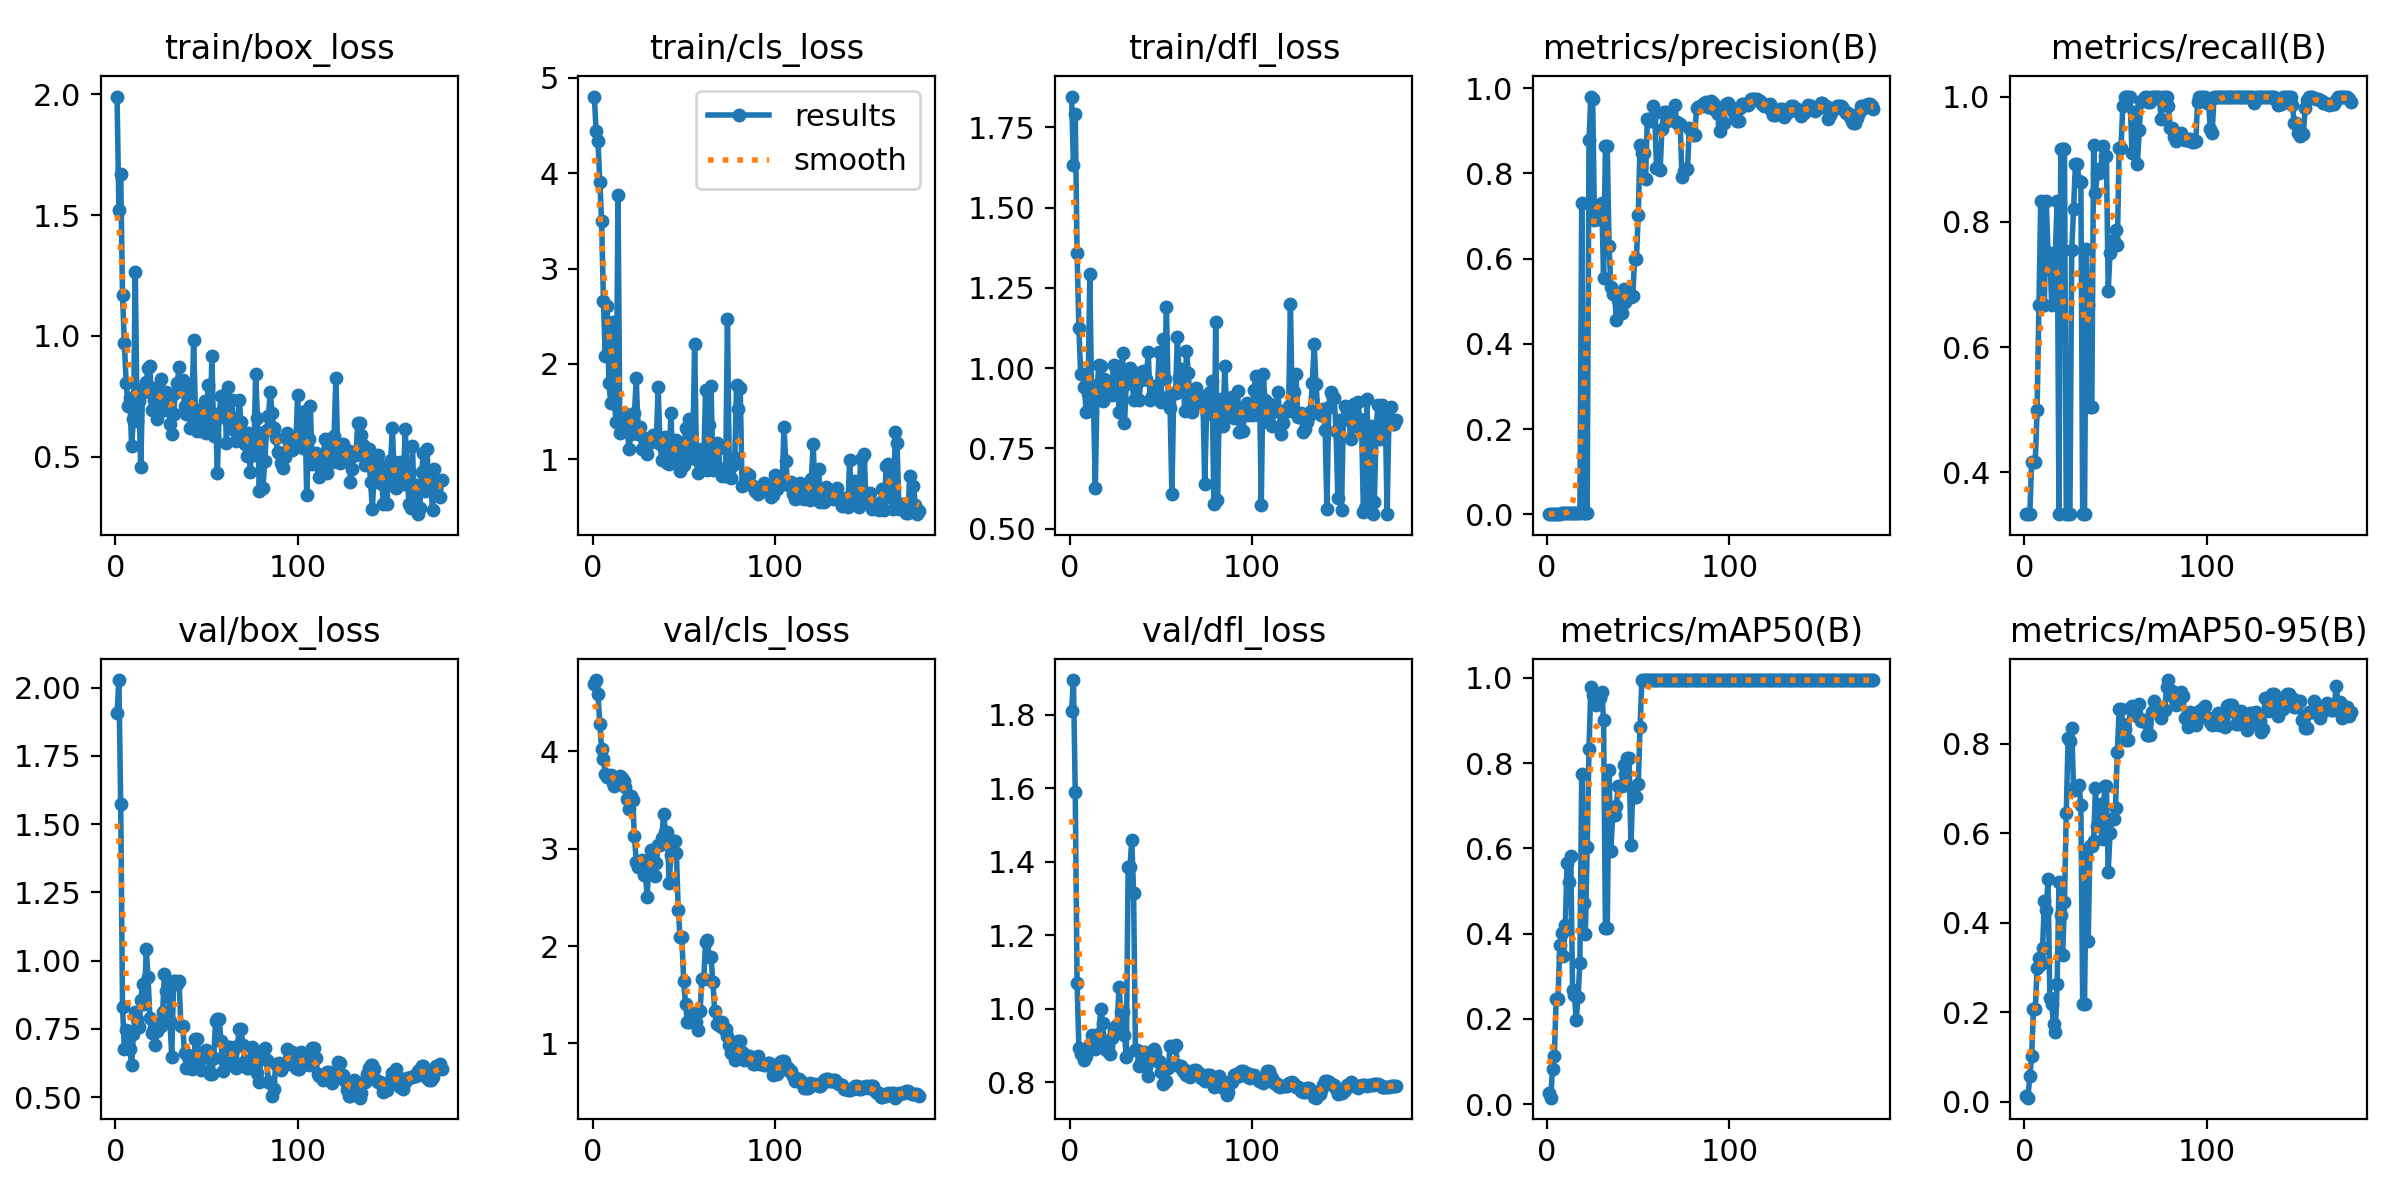

In [ ]:
Image(filename=f'/content/runs/detect/train3/results.png', height=600)

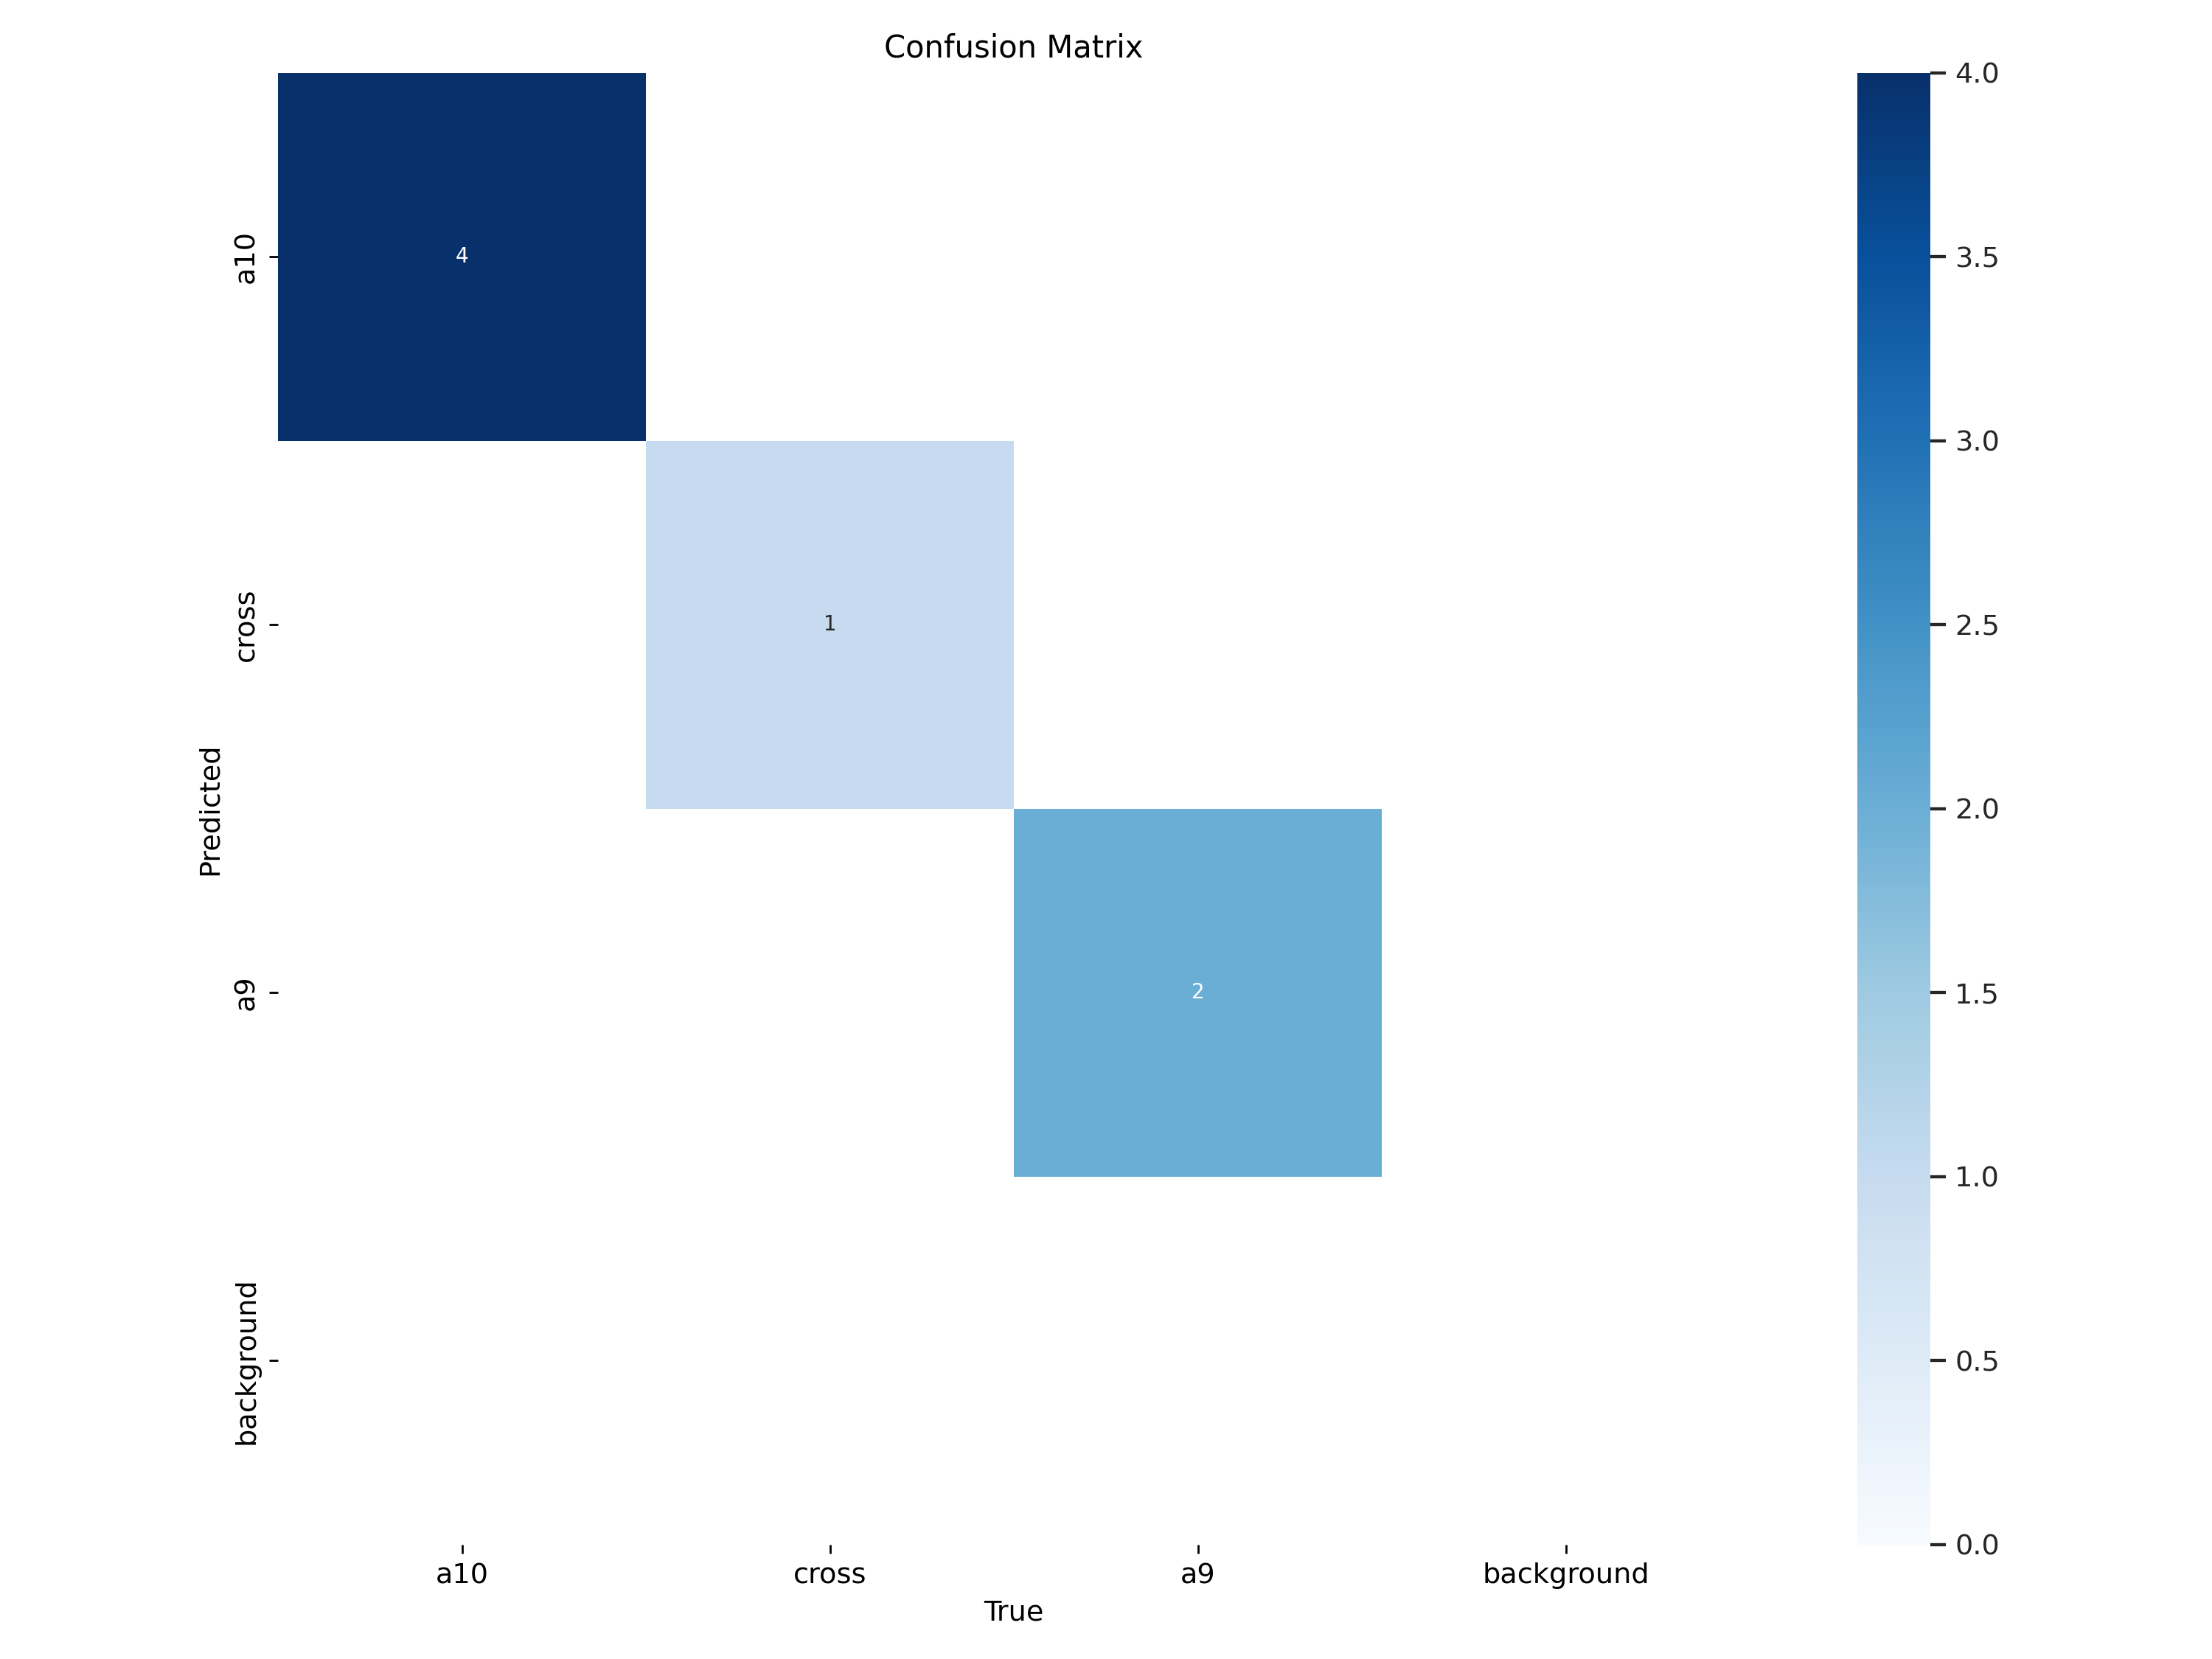

In [ ]:
Image(filename=f'/content/runs/detect/train3/confusion_matrix.png', height=600)


In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt conf=0.5 data=/content/znaki/data.yaml

Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/znaki/test/labels.cache... 6 images, 0 backgrounds, 0 corrupt: 100% 6/6 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:03<00:00,  3.26s/it]
                   all          6          7          1          1      0.995      0.907
                   a10          6          4          1          1      0.995      0.929
                 cross          6          1          1          1      0.995      0.895
                    a9          6          2          1          1      0.995      0.895
Speed: 0.3ms preprocess, 40.4ms inference, 0.0ms loss, 330.7ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.5 data=/content/znaki/data.yaml source=/content/znaki/test/images

Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs

image 1/6 /content/znaki/test/images/00001.jpg: 384x640 1 a10, 101.0ms
image 2/6 /content/znaki/test/images/00002.jpg: 416x640 1 a10, 130.6ms
image 3/6 /content/znaki/test/images/00003.jpg: 480x640 1 a10, 121.4ms
image 4/6 /content/znaki/test/images/00004.png: 384x640 1 a9, 26.2ms
image 5/6 /content/znaki/test/images/00005.webp: 384x640 1 a9, 25.1ms
image 6/6 /content/znaki/test/images/00006.jpg: 640x480 1 a10, 1 cross, 118.0ms
Speed: 2.9ms preprocess, 87.1ms inference, 380.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


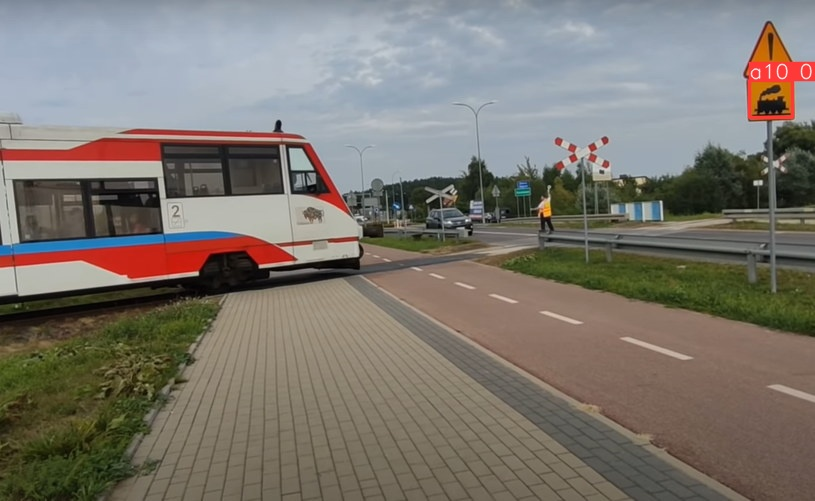

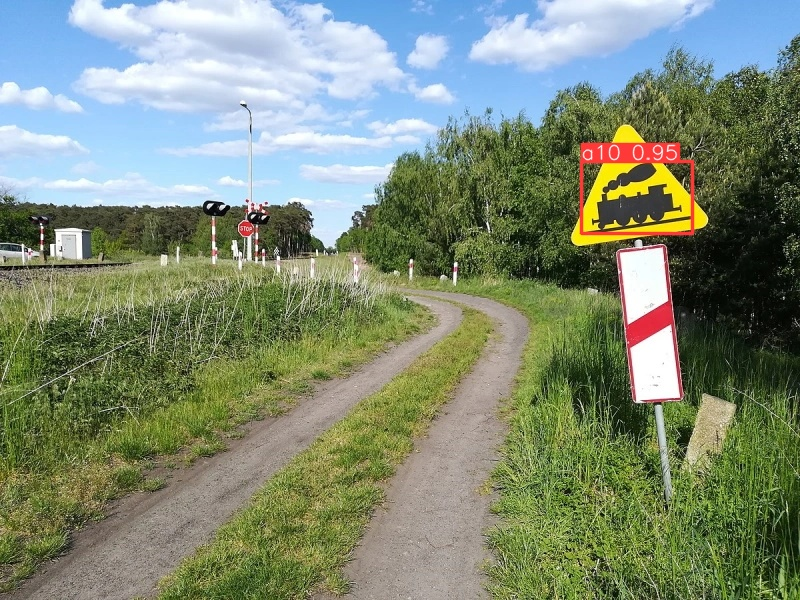

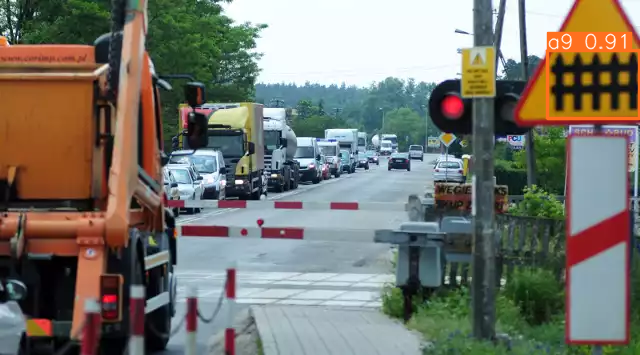

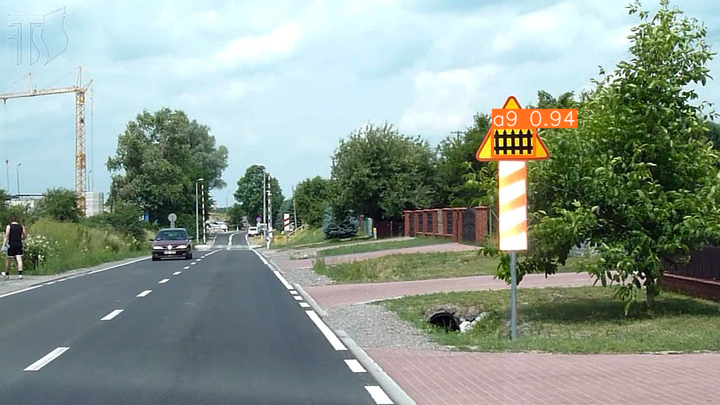

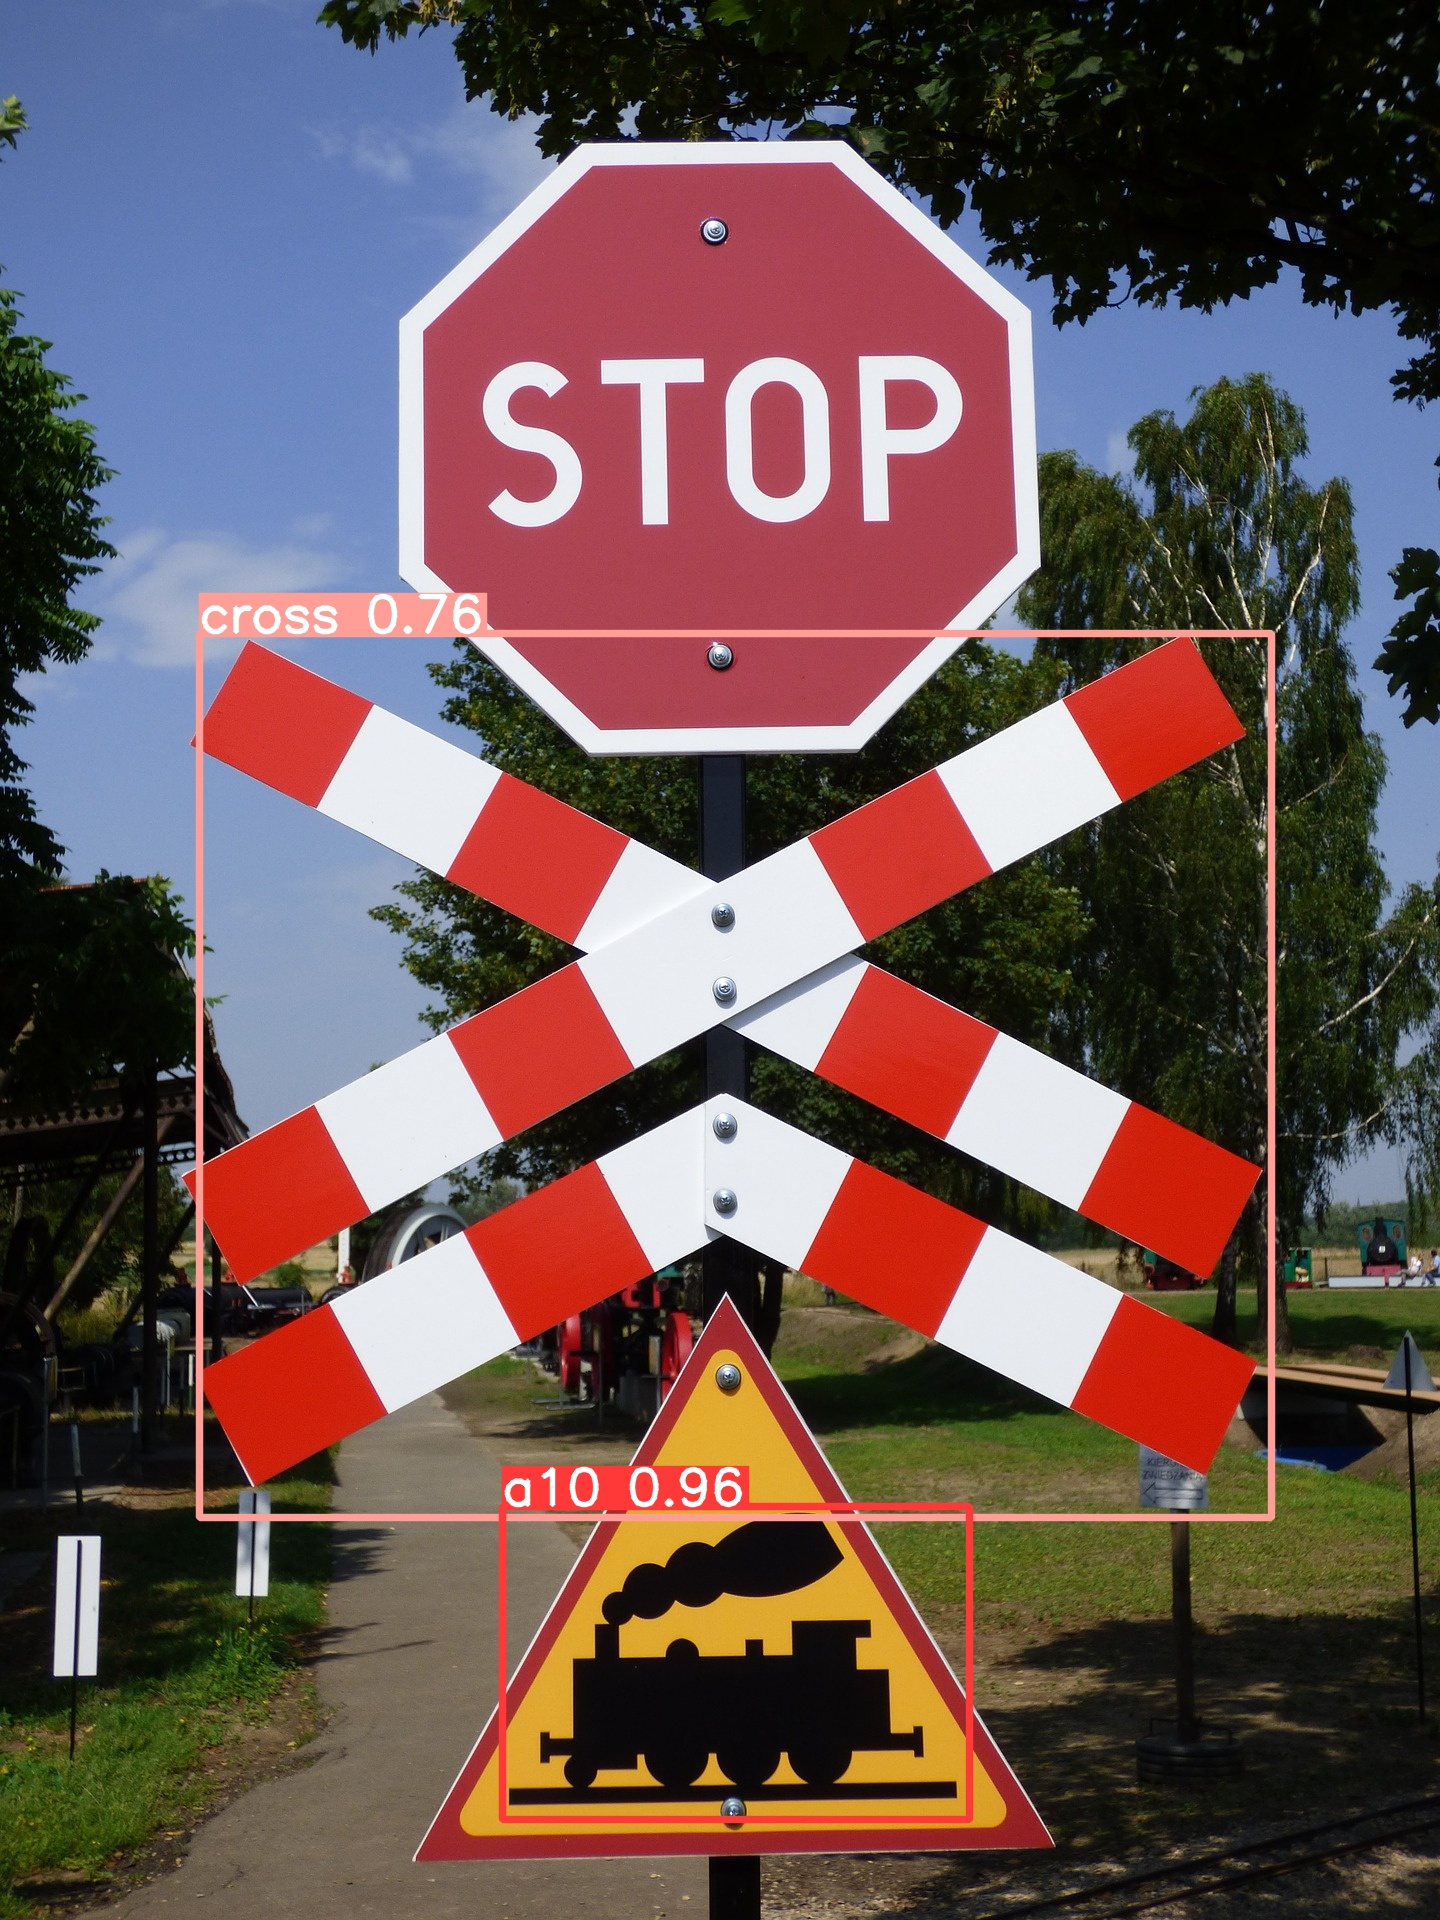

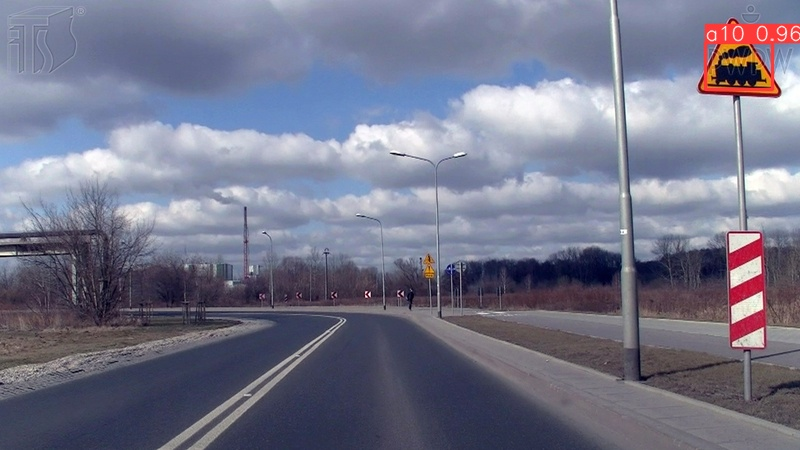

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

dir = f'/content/runs/detect/predict/'
for image_path in os.listdir(dir):
  img = cv2.imread(os.path.join(dir,image_path))
  cv2_imshow(img)